%% Machine Learning Online Class
%  Exercise 6 | Support Vector Machines
%

%% =============== Part 1: Loading and Visualizing Data ================
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

In [191]:
import numpy as np
import matplotlib
from scipy.io import loadmat 
import matplotlib.pyplot as plt
%matplotlib inline 
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sbs
import scipy.optimize as op
from sklearn import svm 

In [192]:
data = loadmat('ex6data1.mat');
X=data['X']
y=data['y']
data = np.c_[X,y]
df= pd.DataFrame(data)
df.columns = ['x1', 'x2','y']

In [193]:
#svc = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)  
clf = svm.SVC(C=100, kernel='linear', max_iter=1000)  

In [194]:
clf.fit(X, np.ravel(y))  
clf.score(X, np.ravel(y))  

1.0

In [195]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

In [196]:
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

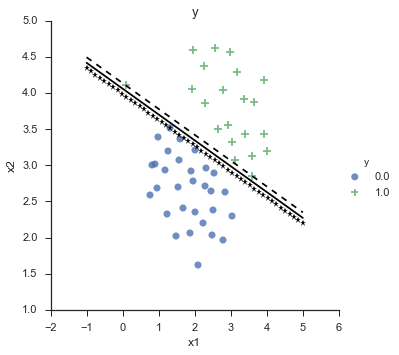

In [197]:
sbs.set_context("notebook", font_scale=1.1)
sbs.set_style("ticks")
sbs.lmplot('x1', 'x2',
           data=df,
           fit_reg=False,
           hue="y",  
        markers=["o", "+"],
          scatter_kws={"marker": "D",
                        "s":50})
plt.title('y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.hold
# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k*')
plt.plot(xx, yy_up, 'k--')

In [198]:
#data 2
data = loadmat('ex6data2.mat');
X=data['X']
y=data['y']
data = np.c_[X,y]
df= pd.DataFrame(data)
df.columns = ['x1', 'x2','y']

In [199]:
clf = svm.SVC(C=10, kernel='rbf', max_iter=50000,gamma=100,probability=False)  
clf.fit(X, np.ravel(y))  
clf.score(X, np.ravel(y)) 

0.99652375434530704

In [200]:
clf

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100, kernel='rbf',
  max_iter=50000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [201]:
h = .02 # step size in the mesh
x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

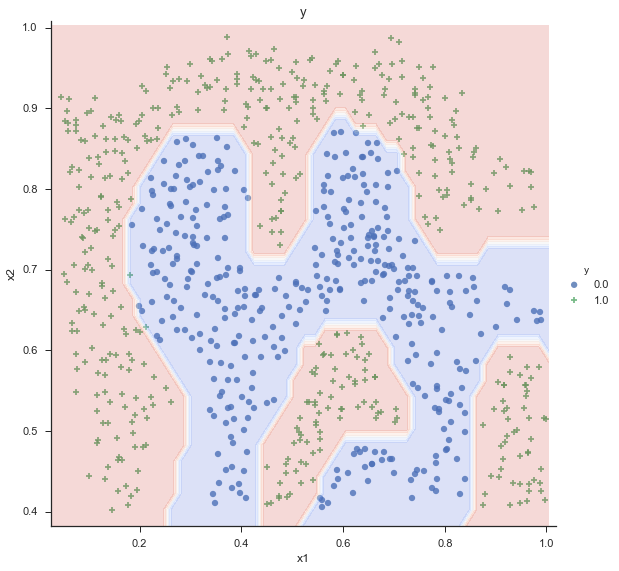

In [202]:
sbs.set_context("talk")
#plt.figure(figsize=(20, 20))
sbs.set_context("notebook", font_scale=1.1)
sbs.set_style("ticks")
sbs.lmplot('x1', 'x2',
           data=df,
           fit_reg=False,
           hue="y",  
        markers=["o", "+"],
          scatter_kws={"marker": "D",
                        "s":40},size=8, aspect=1)
plt.title('y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.hold
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)


In [203]:
#data 3
data = loadmat('ex6data3.mat');
X=data['X']
y=data['y']
data = np.c_[X,y]
df= pd.DataFrame(data)
df.columns = ['x1', 'x2','y']

In [204]:
clf = svm.SVC(C=10, kernel='rbf', max_iter=50000,gamma=10,probability=False)  
clf.fit(X, np.ravel(y))  
clf.score(X, np.ravel(y)) 

0.94312796208530802

In [205]:
clf

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=50000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [206]:
h = .02 # step size in the mesh
x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

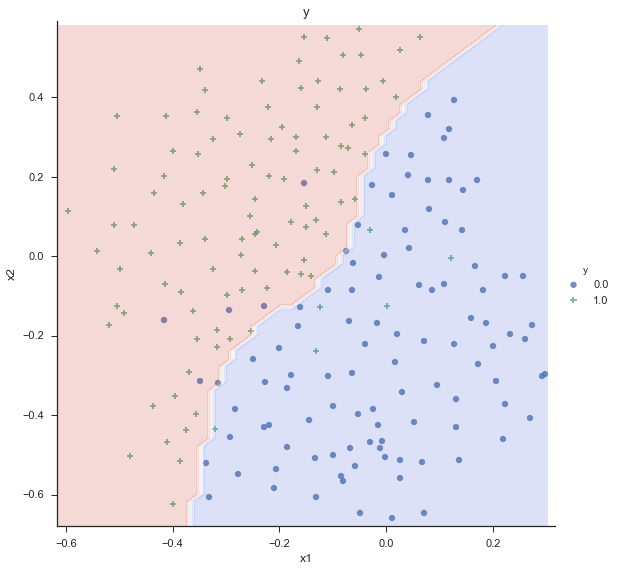

In [207]:
sbs.set_context("talk")
#plt.figure(figsize=(20, 20))
sbs.set_context("notebook", font_scale=1.1)
sbs.set_style("ticks")
sbs.lmplot('x1', 'x2',
           data=df,
           fit_reg=False,
           hue="y",  
        markers=["o", "+"],
          scatter_kws={"marker": "D",
                        "s":40},size=8, aspect=1)
plt.title('y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.hold
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)

In [208]:
#spam
spam_train = loadmat('spamTrain.mat')  
spam_test = loadmat('spamTest.mat')
X = spam_train['X']  
Xtest = spam_test['Xtest']  
y = spam_train['y'].ravel()  
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape 

((4000L, 1899L), (4000L,), (1000L, 1899L), (1000L,))

In [209]:
svc = svm.SVC()  
svc.fit(X, y)  
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))  

Test accuracy = 95.3%


In [ ]:
ytest